In [20]:
import pandas as pd


df = pd.read_csv("gen_solutions.csv")

df["Time"] = df["Time"].divide(1000)

In [47]:
df["Instanzgröße"] = df.apply(lambda row: (row["Nodes"]+row["Edges"])*row["Terminals"],axis=1)
print(df)

     Unnamed: 0                                           Instance  Nodes  \
0             0                         ./instances/instance006.gr     55   
1             1                         ./instances/instance004.gr   2500   
2             2                         ./instances/instance002.gr   2500   
3             3                         ./instances/instance003.gr   2500   
4             4                         ./instances/instance007.gr    157   
..          ...                                                ...    ...   
144         144  barabasi_albert_graph_100_m=0.7_mit_einer_edge...    100   
145         145  barabasi_albert_graph_100_m=0.3_mit_einer_edge...    100   
146         146  barabasi_albert_graph_100_m=0.9_mit_einer_edge...    100   
147         147  barabasi_albert_graph_100_m=0.5_mit_einer_edge...    100   
148         148  barabasi_albert_graph_1000_m=0.9_mit_einer_edg...   1000   

     Terminals  Edges  Solutions     Time  Instanzgröße  
0            7   

[None, None]

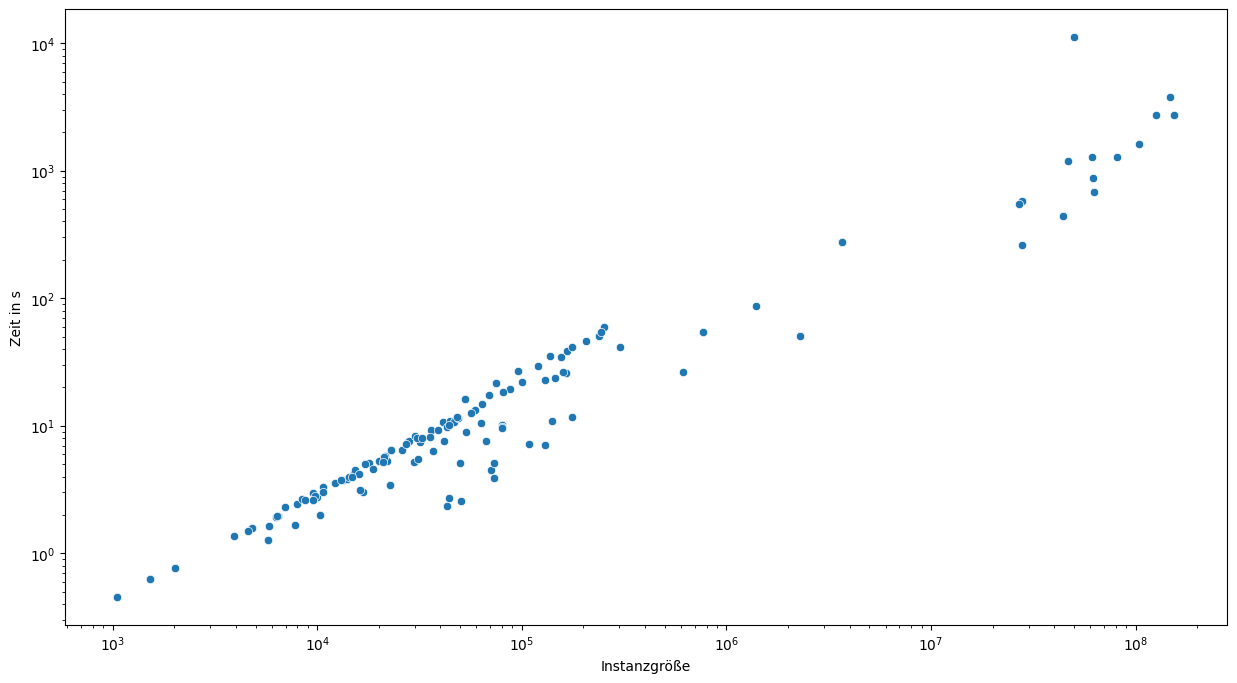

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=df,x ="Instanzgröße",y="Time")
ax.set(xlabel="Instanzgröße",ylabel = "Zeit in s")
ax.set(xscale="log",yscale="log")


In [58]:
df_sph = pd.read_csv("sph_solutions.csv")

df_sph["Time"] = df_sph["Time"].divide(1000)
df_sph["Instanzgröße"] = df_sph.apply(lambda row: (row["Nodes"]+row["Edges"])*row["Terminals"],axis=1)

[None, None]

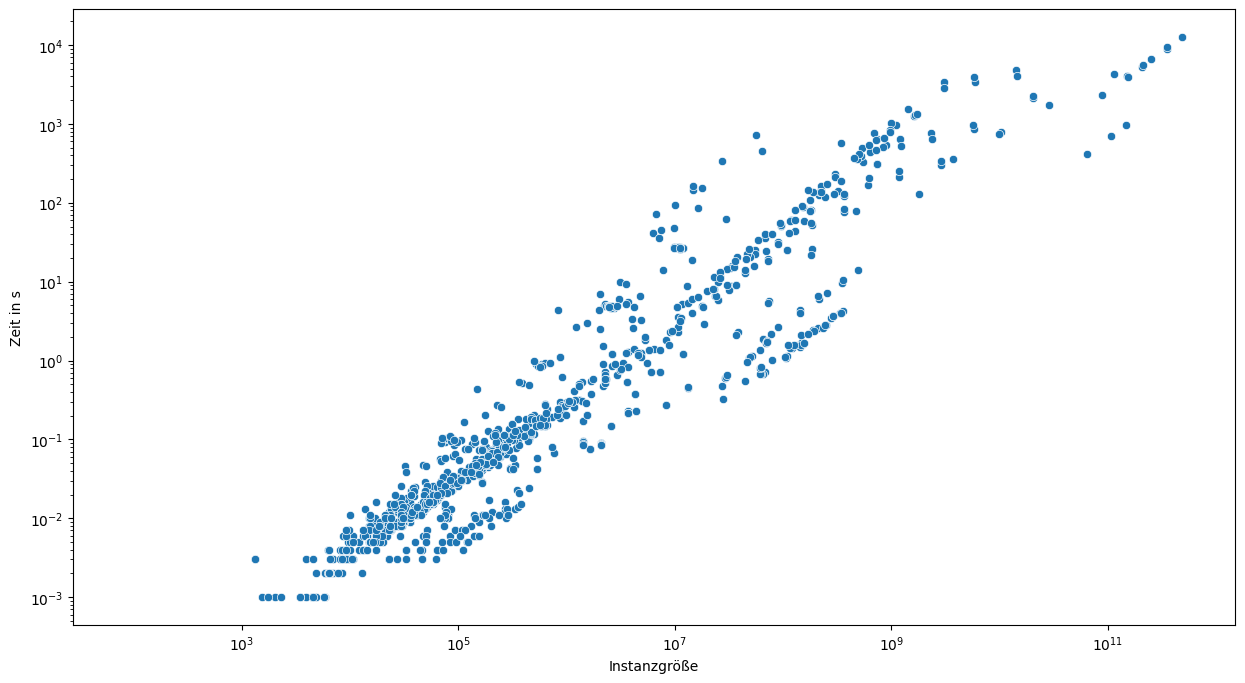

In [63]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=df_sph,x ="Instanzgröße",y="Time")
ax.set(xlabel="Instanzgröße",ylabel = "Zeit in s")
ax.set(yscale="log",xscale="log")

In [31]:
df_sph.sort_values(by=["Nodes"],ascending=False)
print(df_sph.dtypes)

Unnamed: 0        int64
Instance         object
Nodes             int64
Terminals         int64
Edges             int64
Solutions         int64
Time            float64
Instanzgröße      int64
dtype: object


In [56]:
df_merge = pd.merge(df,df_sph,how="inner",on=["Instance","Nodes","Terminals","Edges"])
sols_y = df_merge["Solutions_y"]
sols_x = df_merge["Solutions_x"]
df_merge["Verbesserung"] = sols_y - sols_x
print(df_merge["Verbesserung"].value_counts())

0     92
1     48
3     28
4     17
2     12
5      6
8      6
10     4
13     4
7      4
9      4
29     4
20     2
17     2
11     2
15     2
32     2
25     2
34     2
6      2
16     2
12     2
Name: Verbesserung, dtype: int64


In [57]:
plt.figure(figsize=(15,8))
df_merge.to_csv("df_merge.csv")

<Figure size 1500x800 with 0 Axes>